# Разработка модели машинного обучения на основе данных компаний "Вольный луг" и "ЭкоФерма".

Описание проекта: Владелец фермы "Вольный луг" обратился с просьбой разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. 

Цель исследования: Разработать модель машинного обучения, которая отбирает коров по следующим критериям: средний удой за год не менее 6000 килограммов, молоко должно быть вкусным.

Ход исследования:
*  Подготовка данных:
        Загрузка и изучение общей информации из предоставленных датасетов.
*  Предобработка данных:
        Обработка пропущенных значений, корректировка типа даных, дубликатов.
*  Исследовательский анализ данных:
        Изучение основных параметров объектов, их распределения.
*  Проведите корреляционный анализ признаков в датасете ferma_main.csv:
        Изучение взаимосвязи между признаками, построение диаграмм рассеяния.
*  Задача регрессии:
            Постройка трёх моделей простой линейной регрессии, сравнить их, оценить работу по метрикам, спрогнозировать вкус молока коров, которых хочет купить фермер.
*  Задача классификации:
                Подготовка данных ferma_main.csv, обучение на них логичстической модели, анализ модели, прогноз вкуса молока коров, которых хочет купить фермер

* Итоговые выводы:
        резюмирование полученных результатов, формулировка ключевых выводов.

## 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

import numpy as np

!pip install phik -q

import phik

from scipy import stats as st

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [5]:
ferma_main = ferma_main.rename(columns={'Тип пастбища': 'Тип_пастбища', 'порода папы_быка': 'порода_папы_быка',
                    "Сырой протеин, г": 'Сырой_протеин', 'Удой, кг': 'Удой', 'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ',
                    'СПО (Сахаро-протеиновое соотношение)': 'СПО', 'Вкус молока': 'Вкус_молока'})

In [6]:
ferma_main.columns = ferma_main.columns.str.lower()

In [7]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [8]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
ferma_dad

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [10]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'Имя_папы'})

In [11]:
ferma_dad.columns = ferma_dad.columns.str.lower()

In [12]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [13]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [14]:
cow_buy = cow_buy.rename(columns={'Текущая_жирность,%': 'Жирность,%', 'Текущий_уровень_белок,%': 'Белок,%',
              'Тип пастбища': 'Тип_пастбища', 'порода папы_быка': 'порода_папы_быка'})

In [15]:
cow_buy.columns = cow_buy.columns.str.lower()

Некоторые названия столбцов были переименованы. И приведены к нижнему регистру.

##  2. Предобработка данных

In [16]:
ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность,%          0
белок,%             0
вкус_молока         0
возраст             0
dtype: int64

In [17]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [18]:
cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность,%          0
белок,%             0
возраст             0
dtype: int64

In [19]:
ferma_main.duplicated().sum()

5

In [20]:
ferma_main = ferma_main.drop_duplicates()

In [21]:
ferma_dad.duplicated().sum()

0

In [22]:
cow_buy.duplicated().sum()

4

In [23]:
cow_buy = cow_buy.drop_duplicates()

Замена типа данных

In [24]:
lst = ['эке', 'спо', 'жирность,%', 'белок,%']
for i in lst:
    ferma_main[i] = ferma_main[i].str.replace(',', '.')

In [25]:
ferma_main[['эке', 'спо', 'жирность,%', 'белок,%']] = ferma_main[['эке', 'спо', 'жирность,%', 'белок,%']].astype('float')

In [26]:
lst = ['жирность,%', 'белок,%']
for i in lst:
    cow_buy[i] = cow_buy[i].str.replace(',', '.')

In [27]:
cow_buy[['жирность,%', 'белок,%']] = cow_buy[['жирность,%', 'белок,%']].astype('float')

Проверка неявных дубликатов

In [28]:
for i in ferma_main.columns:
    if isinstance(ferma_main[i][0], str):
        print(ferma_main[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['равнинное' 'равнинные' 'холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [29]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')

In [30]:
for i in ferma_dad.columns:
    if isinstance(ferma_dad[i][0], str):
        print(ferma_dad[i].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [31]:
for i in cow_buy.columns:
    if isinstance(cow_buy[i][0], str):
        print(cow_buy[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


Был изменён тип данных у некоторых столбцов, были удалены явные и неявные дубликаты, пропусков данных не обнаружилось.

## 3. Исследовательский анализ данных

### Гистограмма удоя в ferma_main

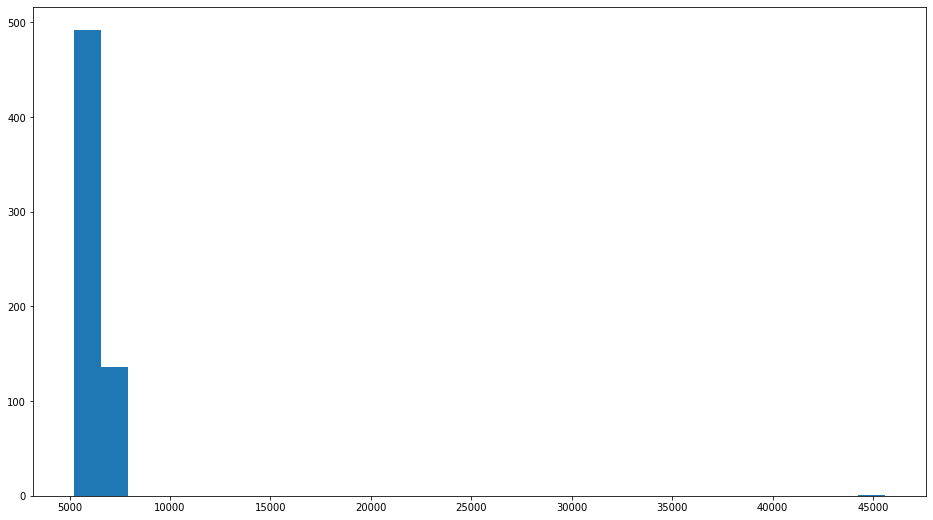

In [32]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['удой'], bins=30);

Выброс в районе 45000

<AxesSubplot:>

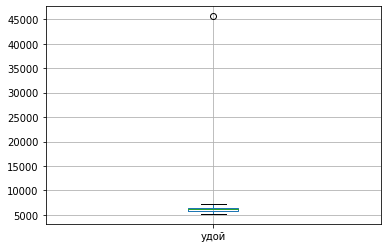

In [33]:
ferma_main.boxplot('удой')

In [34]:
ferma_main['удой'].sort_values()

273     5204
397     5207
589     5213
322     5215
578     5235
       ...  
294     7197
296     7201
135     7207
70      7222
16     45616
Name: удой, Length: 629, dtype: int64

In [35]:
ferma_main = ferma_main[ferma_main['удой'] < 45000]

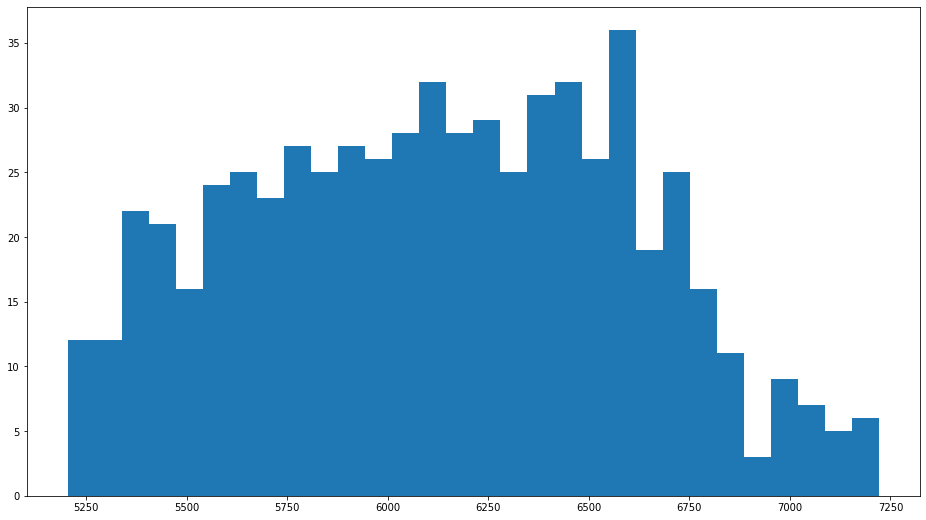

In [36]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['удой'], bins=30);

Гистограмма выглядит в порядке после удаления выброса.

### Гистограмма ЭКЕ в ferma_main

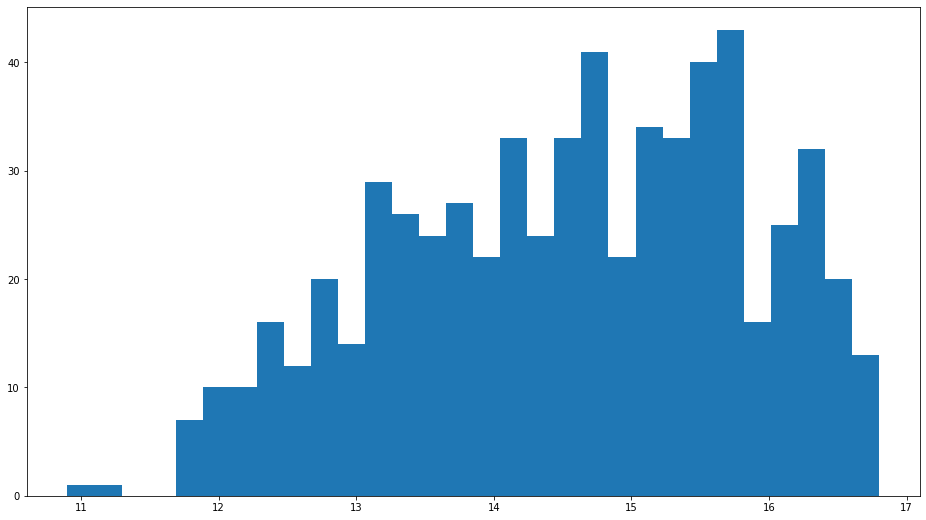

In [37]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['эке'], bins=30);

<AxesSubplot:>

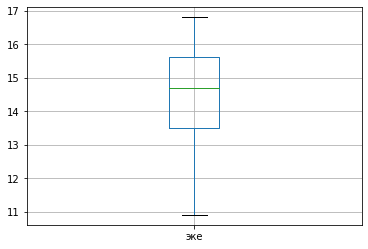

In [38]:
ferma_main.boxplot('эке')

Выбросов нет, всё в порядке.

### Гистограмма сырого протеина в ferma_main

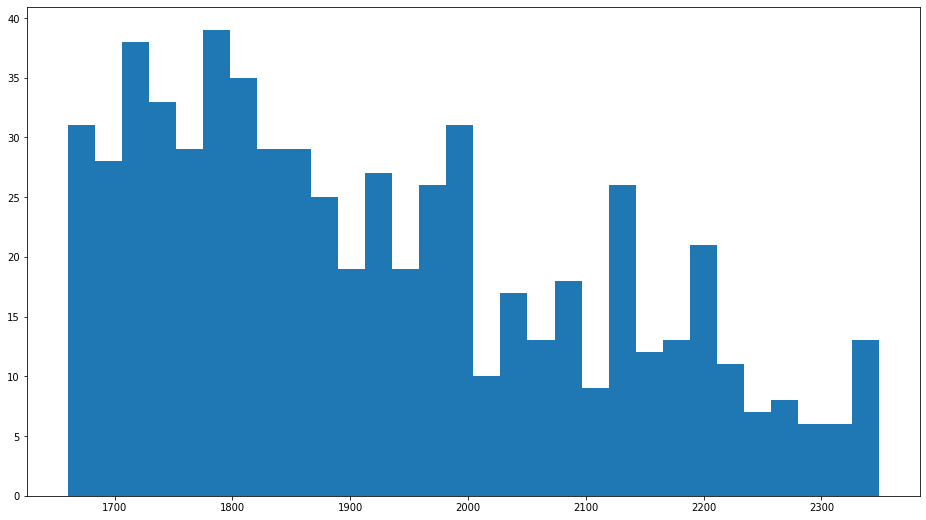

In [39]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['сырой_протеин'], bins=30);

<AxesSubplot:>

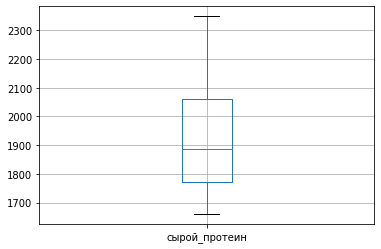

In [40]:
ferma_main.boxplot('сырой_протеин')

Выбросов нет, всё в порядке.

### Гистограмма СПО в ferma_main

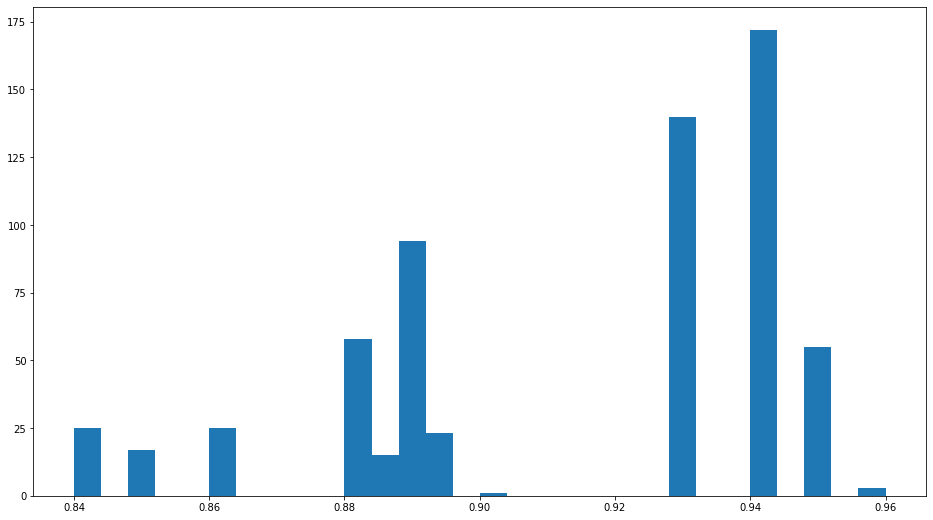

In [41]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['спо'], bins=30);

<AxesSubplot:>

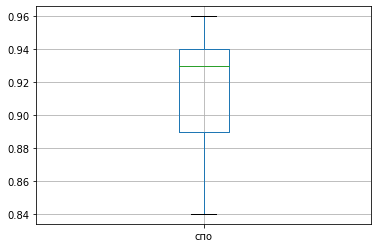

In [42]:
ferma_main.boxplot('спо')

Выбросов нет, всё в порядке.

### Гистограмма породы в ferma_main

<AxesSubplot:ylabel='порода'>

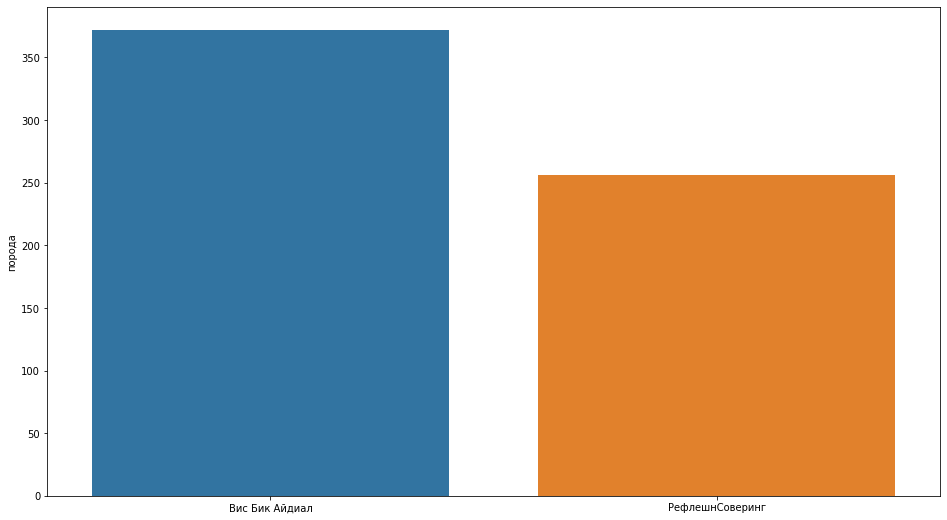

In [43]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_main['порода'].value_counts().index,
                     y=ferma_main['порода'].value_counts())

Коров породы Вис Бик Айдиал больше, чем коров породы Рефлешн Соверинг

### Гистограмма типа пастбища в ferma_main

<AxesSubplot:ylabel='тип_пастбища'>

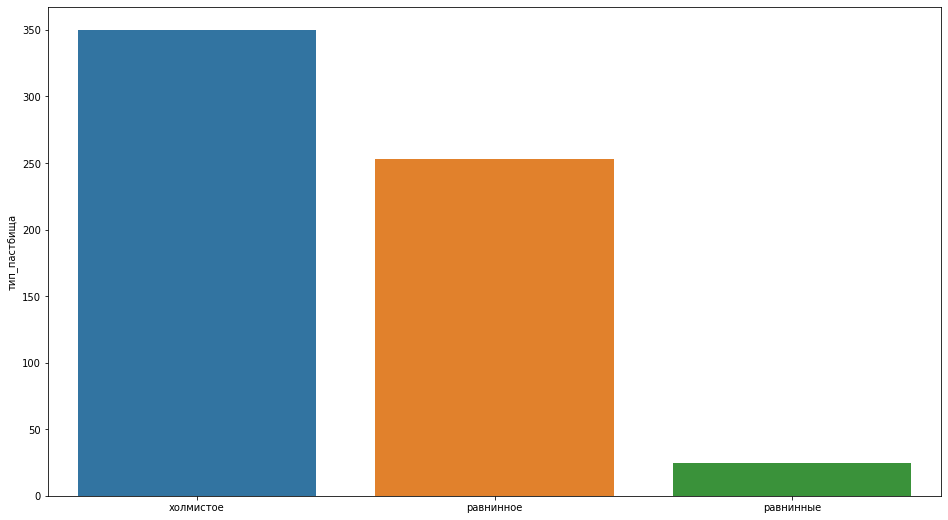

In [44]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_main['тип_пастбища'].value_counts().index,
                     y=ferma_main['тип_пастбища'].value_counts())

Холмистых пастбищ больше, чем равнинных

### Гистограмма породы папы быка в ferma_main

<AxesSubplot:ylabel='порода_папы_быка'>

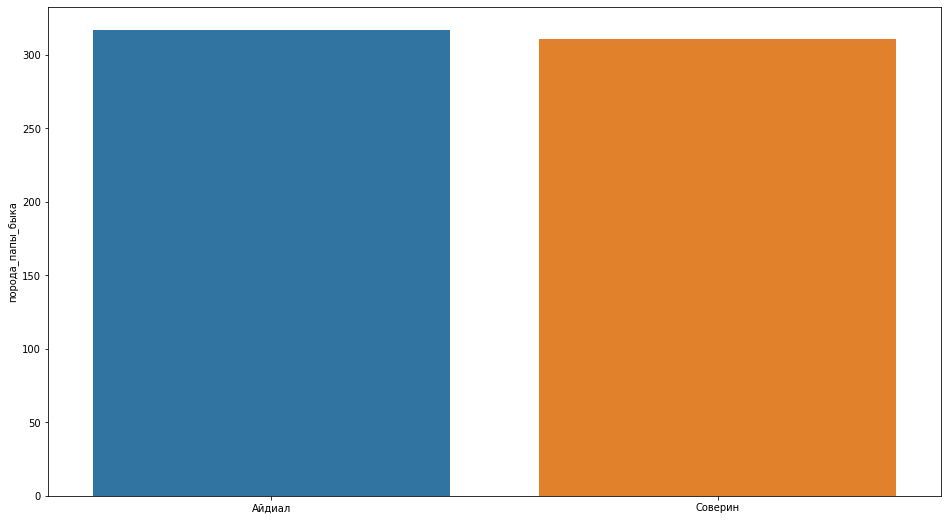

In [45]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_main['порода_папы_быка'].value_counts().index,
                     y=ferma_main['порода_папы_быка'].value_counts())

Быков породы Айдиал чуть больше, чем быков породы Соверин

### Гистограмма жирности в ferma_main

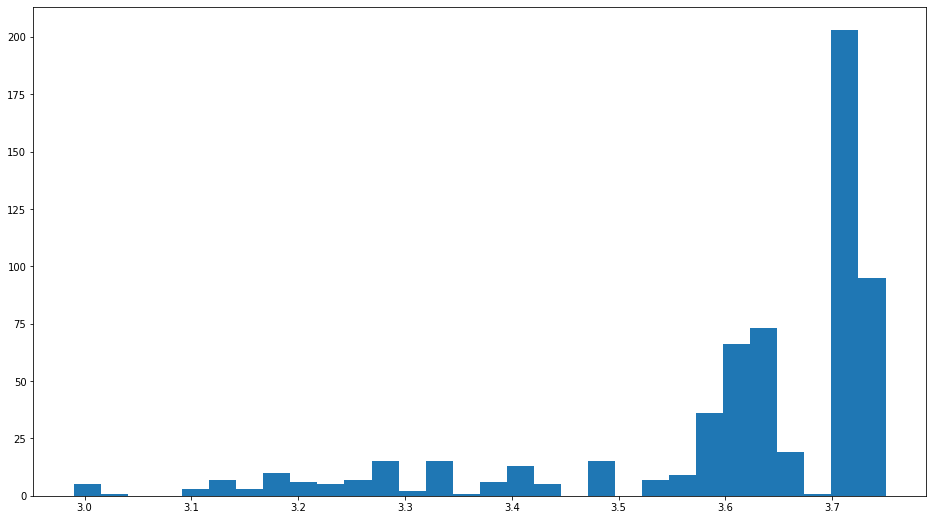

In [46]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['жирность,%'], bins=30);

<AxesSubplot:>

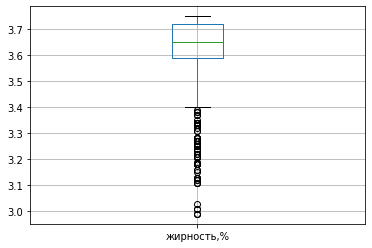

In [47]:
ferma_main.boxplot('жирность,%')

Данные в порядке.

### Гистограмма белка в ferma_main

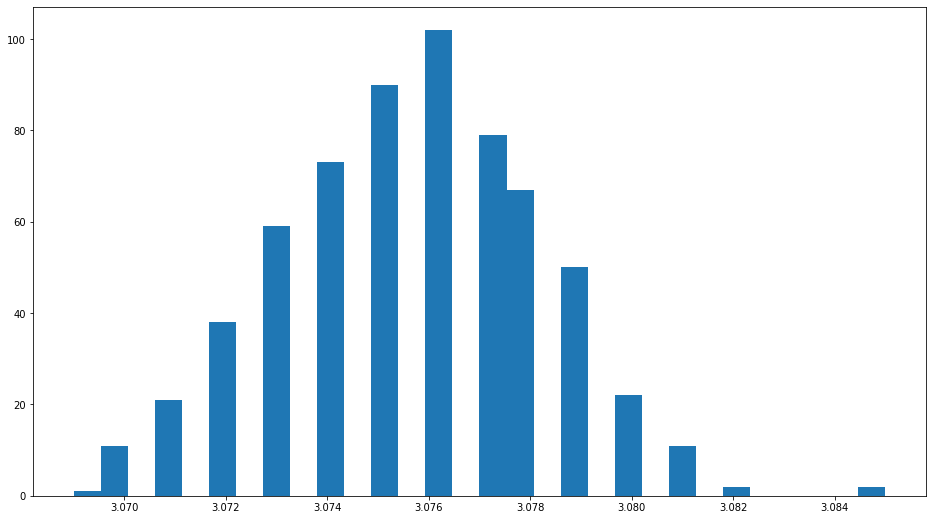

In [48]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['белок,%'], bins=30);

<AxesSubplot:>

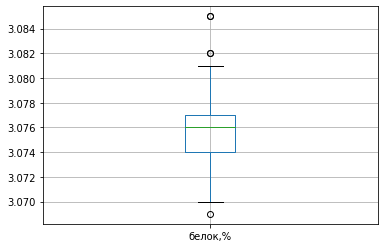

In [49]:
ferma_main.boxplot('белок,%')

Данные в порядке

### Гистограмма белка в ferma_main

<AxesSubplot:ylabel='вкус_молока'>

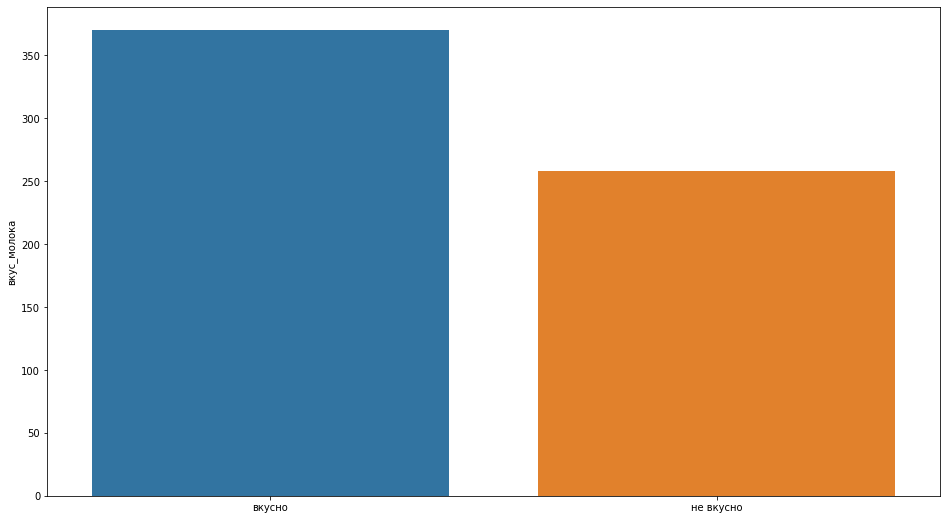

In [50]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_main['вкус_молока'].value_counts().index,
                     y=ferma_main['вкус_молока'].value_counts())

Вкусного молока больше, чем невкусного.

### Гистограмма возраста в ferma_main

<AxesSubplot:ylabel='возраст'>

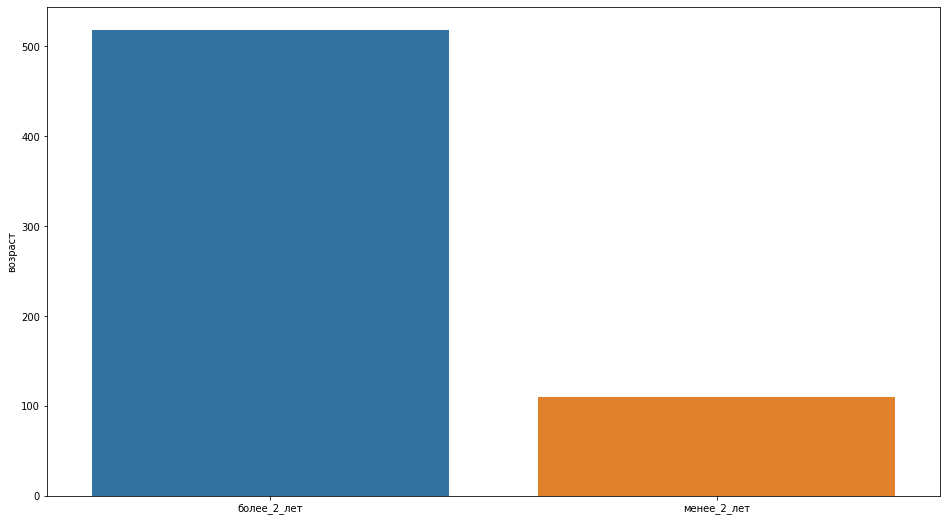

In [51]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_main['возраст'].value_counts().index,
                     y=ferma_main['возраст'].value_counts())

Большинство коров старше двух лет.

### Гистограмма имён папы в ferma_dad

<AxesSubplot:ylabel='имя_папы'>

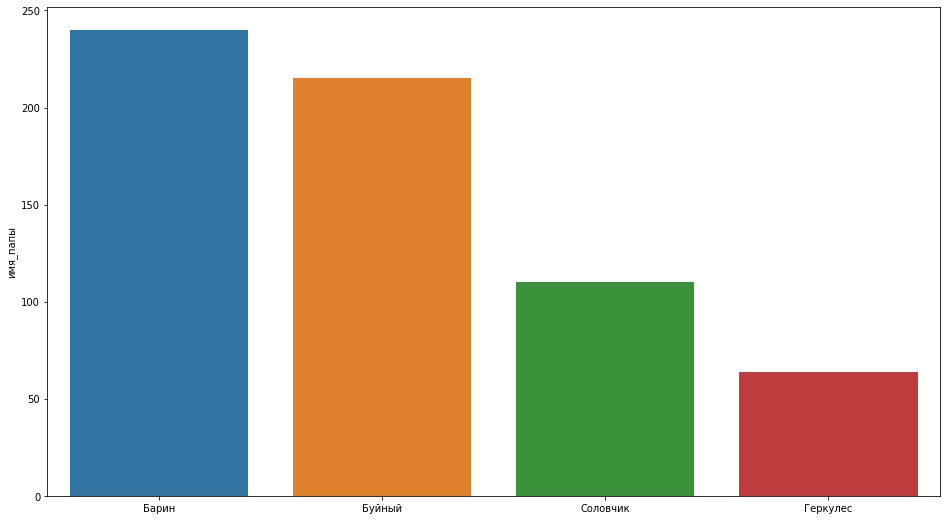

In [52]:
plt.figure(figsize=(16, 9))
sns.barplot(x=ferma_dad['имя_папы'].value_counts().index,
                     y=ferma_dad['имя_папы'].value_counts())

У быка по имени Барин больше всего детей, у Геркулеса меньше всего.

### Гистограмма породы в cow_buy

<AxesSubplot:ylabel='порода'>

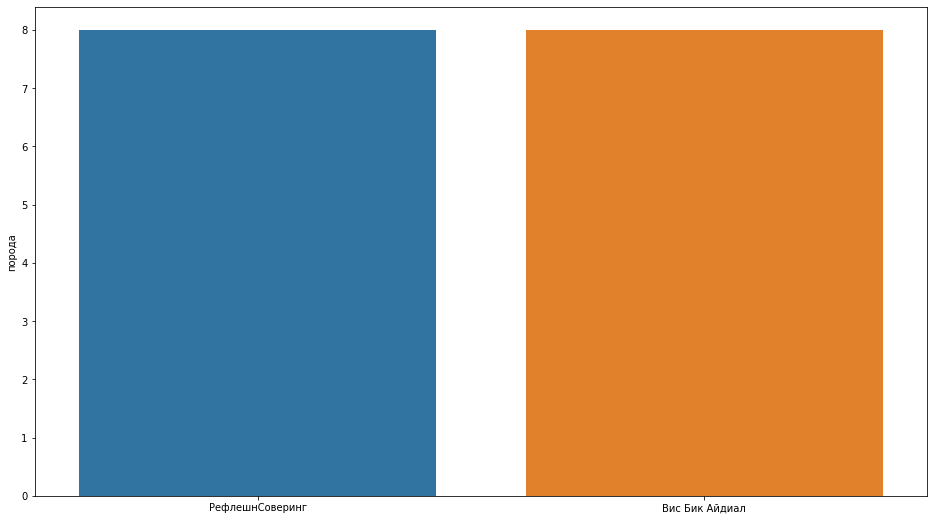

In [53]:
plt.figure(figsize=(16, 9))
sns.barplot(x=cow_buy['порода'].value_counts().index,
                     y=cow_buy['порода'].value_counts())

Коров породы Вис Бик Айдиал и Рефлешн Соверинг одинаковое количество.

### Гистограмма типа пастбища в cow_buy

<AxesSubplot:ylabel='тип_пастбища'>

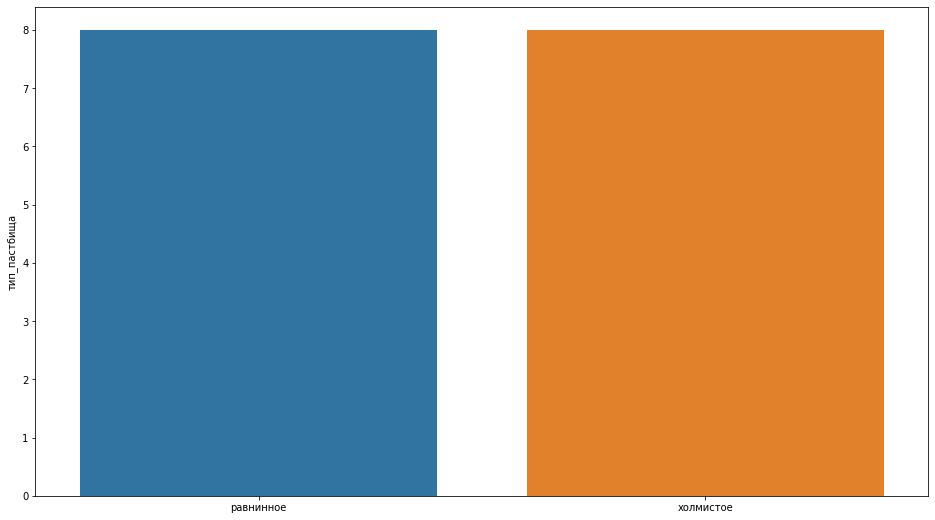

In [54]:
plt.figure(figsize=(16, 9))
sns.barplot(x=cow_buy['тип_пастбища'].value_counts().index,
                     y=cow_buy['тип_пастбища'].value_counts())

Равнинных пастбищ столько же, сколько и холмистых

### Гистограмма породы папы быка в cow_buy

<AxesSubplot:ylabel='порода_папы_быка'>

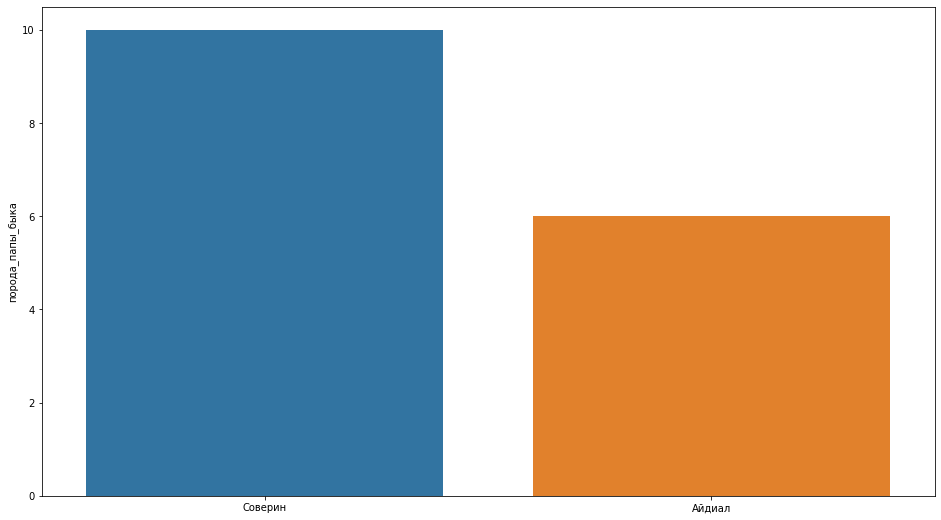

In [55]:
plt.figure(figsize=(16, 9))
sns.barplot(x=cow_buy['порода_папы_быка'].value_counts().index,
                     y=cow_buy['порода_папы_быка'].value_counts())

### Гистограмма имени папы в cow_buy

<AxesSubplot:ylabel='имя_папы'>

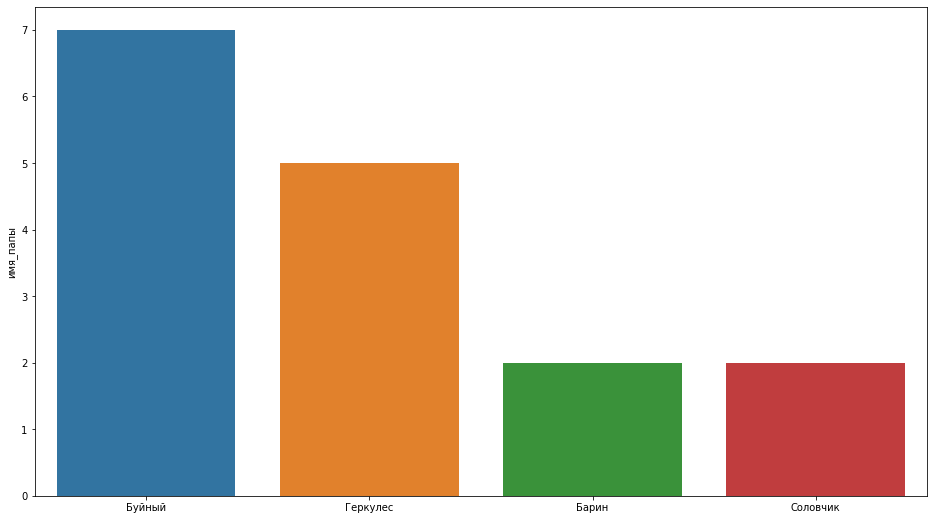

In [56]:
plt.figure(figsize=(16, 9))
sns.barplot(x=cow_buy['имя_папы'].value_counts().index,
                     y=cow_buy['имя_папы'].value_counts())

У быка по имени Буйный больше всего детей, у быков по имени Барин и Соловчик меньше всего детей.

### Гистограмма жирности в cow_buy

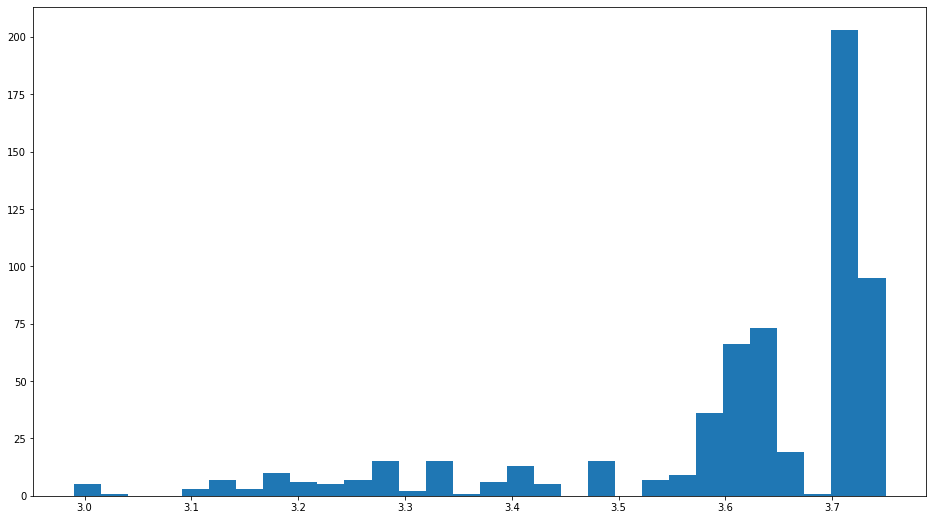

In [57]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['жирность,%'], bins=30);

<AxesSubplot:>

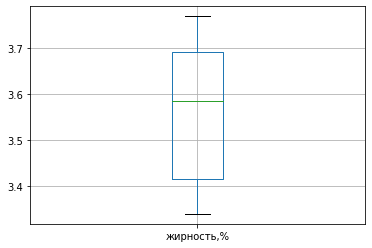

In [58]:
cow_buy.boxplot('жирность,%')

Данные в порядке.

### Гистограмма уровня белка в cow_buy

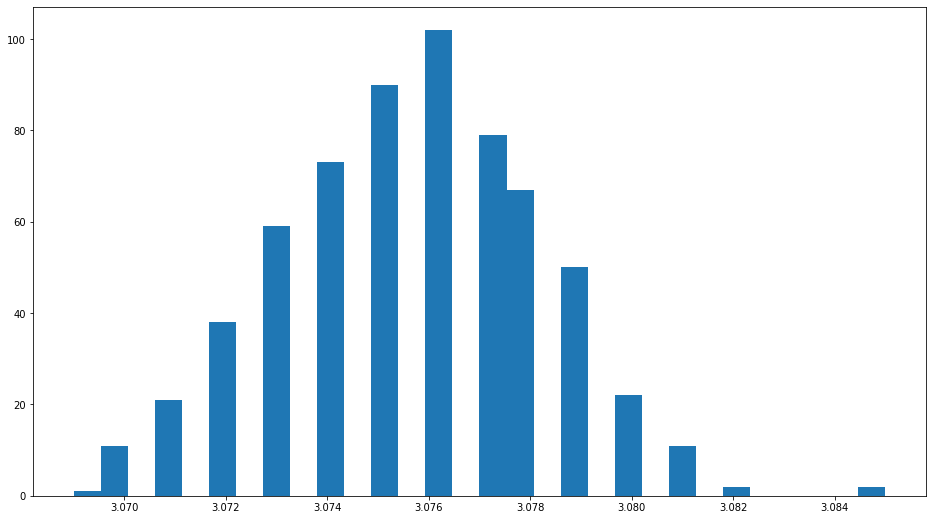

In [59]:
plt.figure(figsize=(16, 9))
plt.hist(ferma_main['белок,%'], bins=30);

<AxesSubplot:>

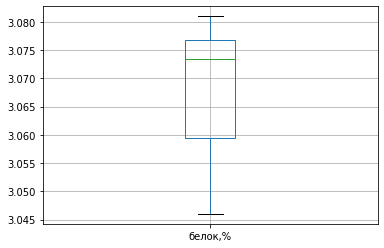

In [60]:
cow_buy.boxplot('белок,%')

Данные в порядке.

### Гистограмма возраста в cow_buy

<AxesSubplot:ylabel='возраст'>

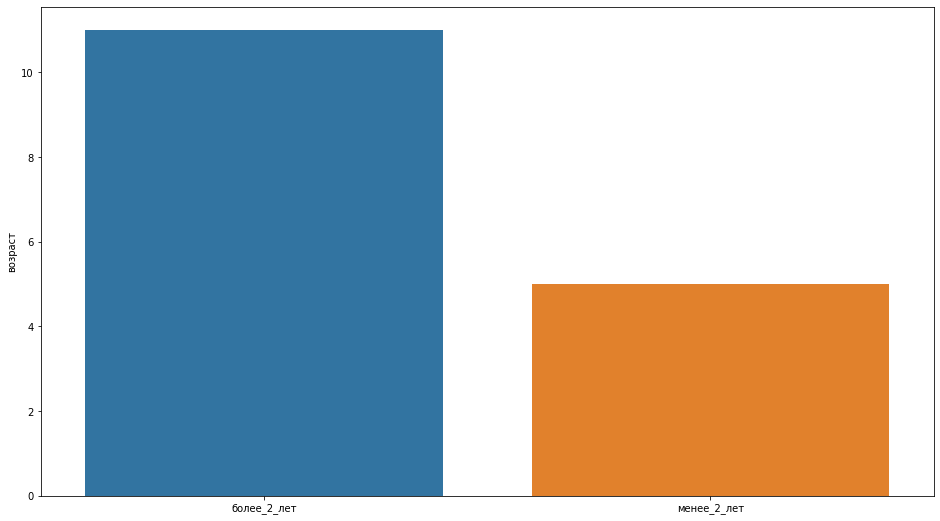

In [61]:
plt.figure(figsize=(16, 9))
sns.barplot(x=cow_buy['возраст'].value_counts().index,
                     y=cow_buy['возраст'].value_counts())

Большинство коров старше двух лет.

Заметим, что не все количественные признаки распределены нормально, например, жирность, спо, удой

## 4. Корреляционный анализ

### Матрица корелляции

In [62]:
ferma_main.drop('id', axis=1).phik_matrix(interval_cols=['удой', 'эке', 'сырой_протеин', 'спо', 'жирность,%', 'белок,%', 'эке_в_квадрате'])

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
удой,1.000000,0.720719,0.463224,0.661359,0.164744,0.265234,0.519915,0.707654,0.058970,0.173122,0.998101
эке,0.720719,1.000000,0.456484,0.591190,0.123086,0.111777,0.171355,0.715914,0.000000,0.272265,0.771596
сырой_протеин,0.463224,0.456484,1.000000,0.387188,0.090925,0.088735,0.000000,0.397380,0.202474,0.176480,0.351685
спо,0.661359,0.591190,0.387188,1.000000,0.062660,0.232757,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.084197,0.089330,0.222825,0.361851,0.000000,0.057295
тип_пастбища,0.265234,0.111777,0.088735,0.232757,0.084197,1.000000,0.065696,0.012454,0.158844,0.104132,0.066703
порода_папы_быка,0.519915,0.171355,0.000000,0.425601,0.089330,0.065696,1.000000,0.000000,0.134582,0.000000,0.355817
"жирность,%",0.707654,0.715914,0.397380,0.645581,0.222825,0.012454,0.000000,1.000000,0.000000,0.198793,0.677913
"белок,%",0.058970,0.000000,0.202474,0.073787,0.361851,0.158844,0.134582,0.000000,1.000000,0.143857,0.000000
вкус_молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.104132,0.000000,0.198793,0.143857,1.000000,0.165974


### Корелляция удоя с ЭКЕ

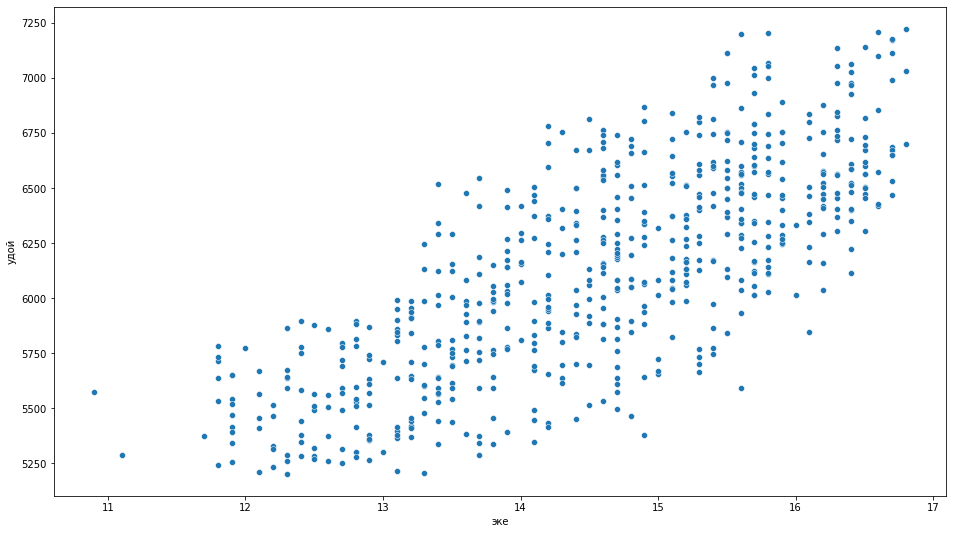

In [63]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'эке', y = 'удой');

Сильная зависимость, похожая на что-то среднее между линейной и квадратичной зависимостью.

### Корелляция удоя с сырым протеином

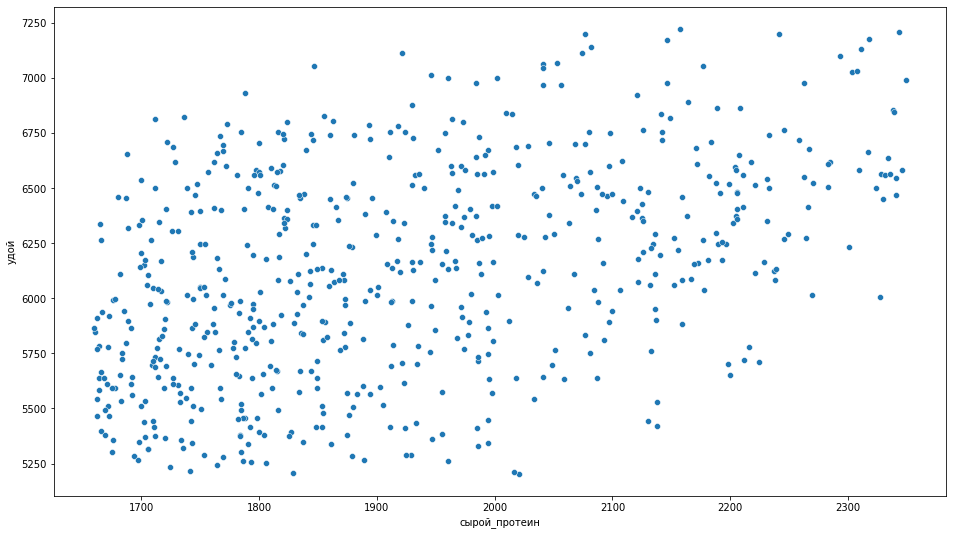

In [64]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'сырой_протеин', y = 'удой');

Слабая линейная зависимость.

### Корелляция удоя с СПО

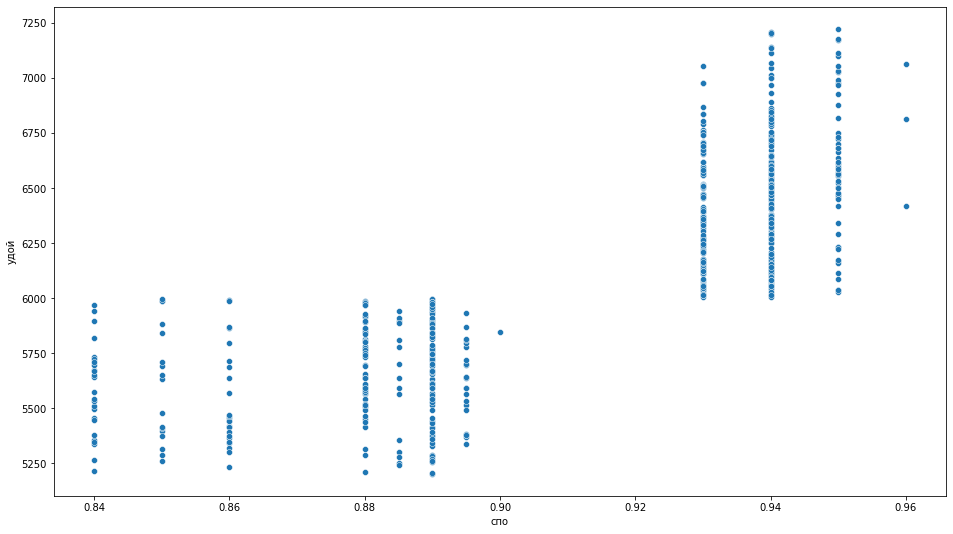

In [65]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'спо', y = 'удой');

Сильная нелинейная зависимость.

### Корелляция удоя с жирностью

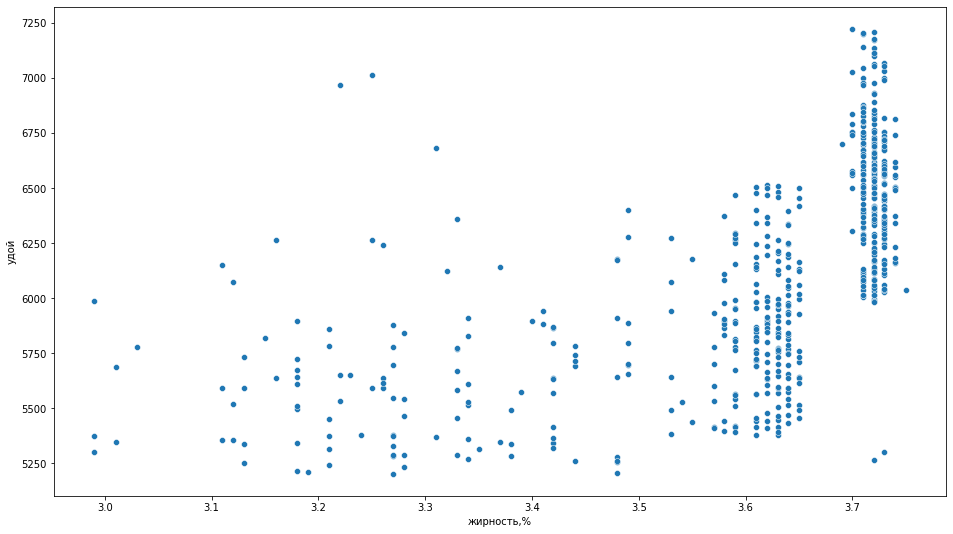

In [66]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'жирность,%', y = 'удой');

Есть нелинейная зависимость.

### Корелляция удоя с белком

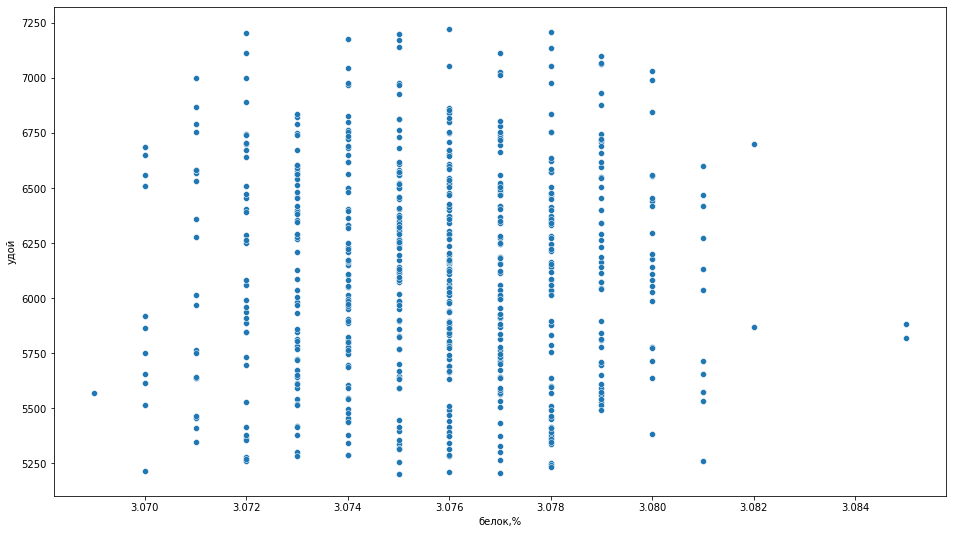

In [67]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'белок,%', y = 'удой');

Очень слабая нелинейная зависимость.

### Корелляция удоя с породой

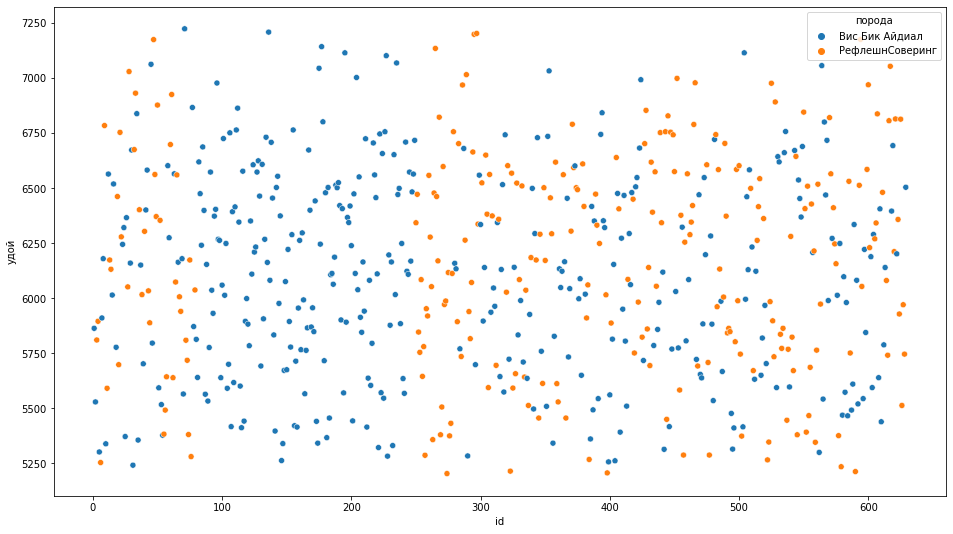

In [68]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'id', y = 'удой', hue='порода');

Удой Вис Бик Айдиал не отличается от удоя РефлешнСоверинг

### Корелляция удоя с возрастом

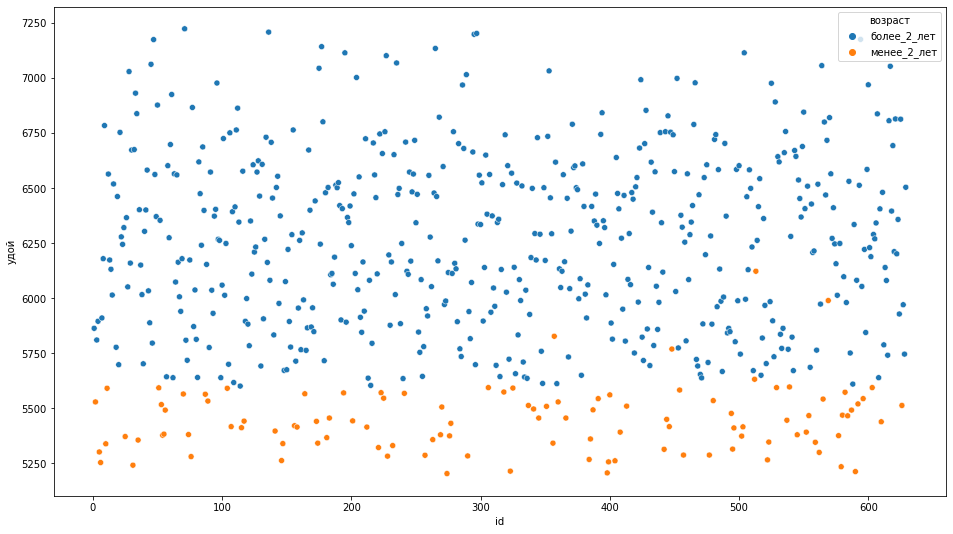

In [69]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'id', y = 'удой', hue='возраст');

Удой коров, которым меньше двух лет, меньше, чем удой коров, которым большем двух лет.

### Корелляция удоя с типом пастбища

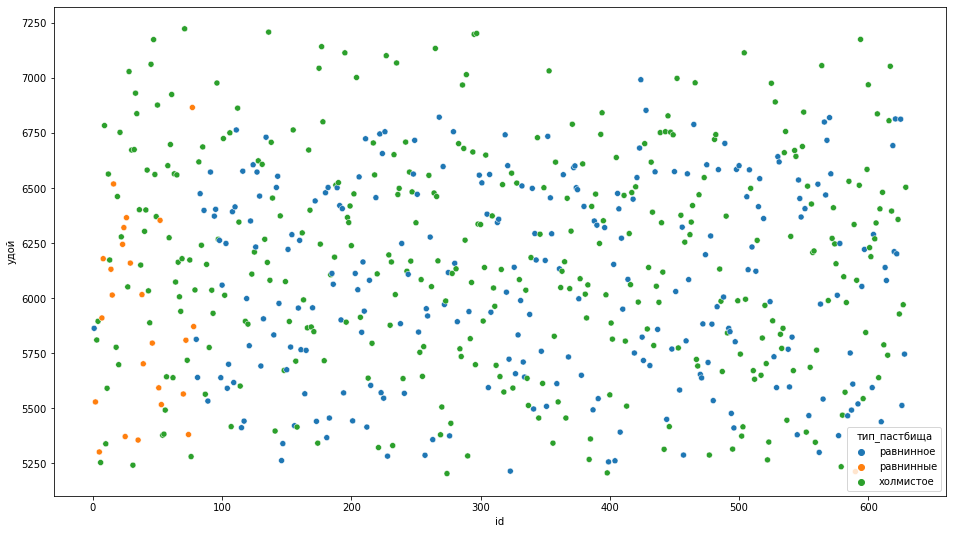

In [70]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'id', y = 'удой', hue='тип_пастбища');

Удой коров на холмистом пастбище немного больше, чем удой коров на равнинном пастбище

### Корелляция удоя с породой папы быка

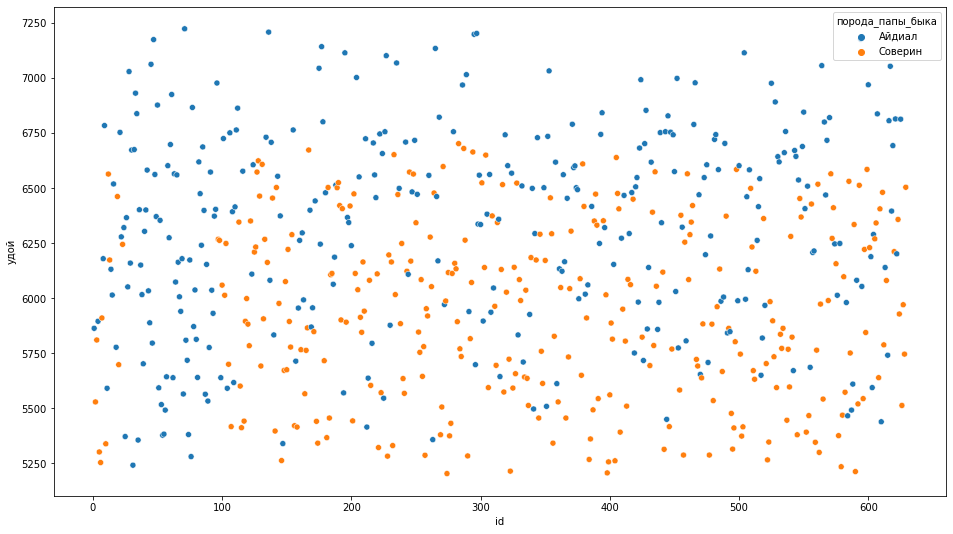

In [71]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'id', y = 'удой', hue='порода_папы_быка');

Удой коров, у которых папа бык породы Айдиал больше, чем удой коров, у которых папа бык породы Соверин.

### Корелляция удоя со вкусом молока

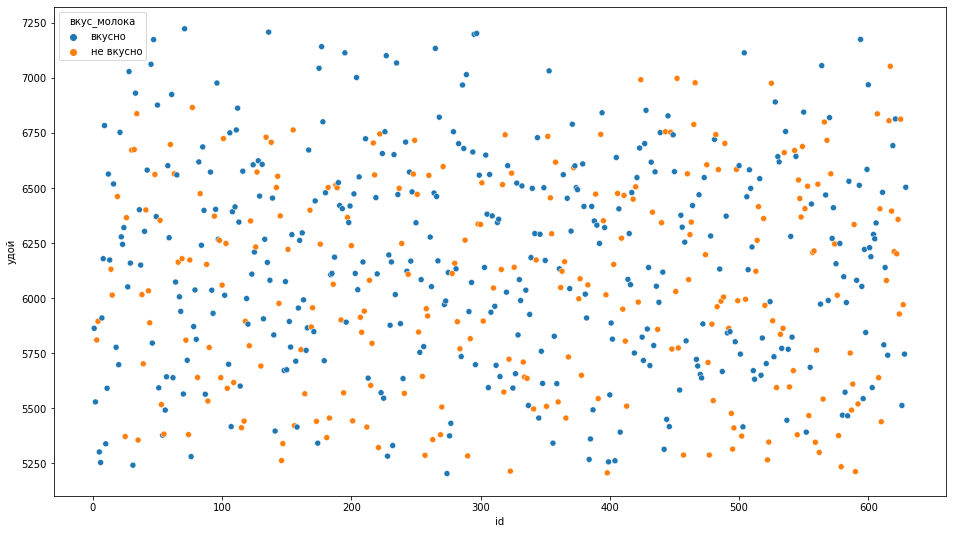

In [72]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = ferma_main, x = 'id', y = 'удой', hue='вкус_молока');

Вкус молока не влияет на удой.

Проанализировав корелляцию удоя со всеми признаками, можем установить, что присутствуют нелинейные зависимости (помимо линейных), мультиколлинеарность отсутствует.

## 5. Обучение моделей линейной регрессии

### Обучение первой модели

In [73]:
X = ferma_main[['эке', 'возраст', 'порода_папы_быка', 'тип_пастбища', 'спо', 'сырой_протеин', 'порода']]
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

Возьмём все линейные признаки и эке, т.к оно очень похоже на линейный признак.

### Кодирование категориальных признаков

In [74]:
lst = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода']
encoder = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe = encoder.fit_transform(X_train[lst])
X_test_ohe = encoder.transform(X_test[lst])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

### Масштабирование количественных признаков

In [75]:
lst = ['эке', 'спо', 'сырой_протеин']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[lst])
X_test_scaled = scaler.transform(X_test[lst])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=lst)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=lst)

### Обучение модели линейной регрессии

In [76]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [77]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions_1 = model_lr.predict(X_test)

### Оценка качества модели с помощью метрики R2

In [78]:
r2 = r2_score(y_test, predictions_1)
r2

0.7885963441936694

Результат неплохой, посмотрим на остатки

### Анализ остатков

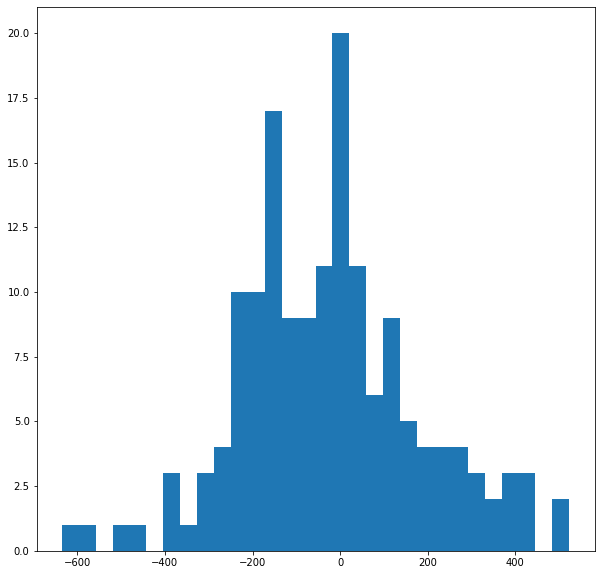

In [79]:
residuals = y_test - predictions_1
plt.figure(figsize = (10, 10))
plt.hist(residuals, bins = 30);

Пик смещён влево, это значит, что наша модель завышает значения.

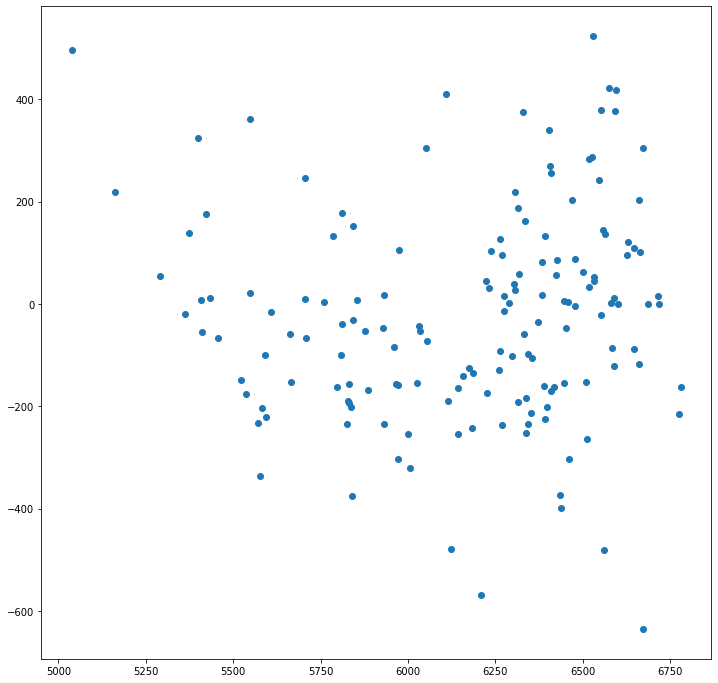

In [80]:
plt.figure(figsize = (12,12))
plt.scatter(x = predictions_1, y = residuals);

При слишком маленьких и при слишком больших значениях наблюдается разброс. Это говорит о нестабильности модели.

Метрика R2 у данной модели равна примерно 78%. Это неплохой результат. Смотря на разброс остатков, можно сказать, что пик смещён влево. Это говорит о том, что наша модель завышает значеия удоя. Анализ остатков с помощью графика показал, что при слишком маленьких и при слишком больших значениях наблюдается разброс. Это говорит о нестабильности модели. Чтобы улучшить результаты, сделаем что-то с нелинейностью признаков спо и эке.

### Обучение второй модели

### Устранение нелинейности

In [81]:
ferma_main['спо_кат'] = ferma_main['спо'].apply(lambda x: 'меньше 0.92' if x < 0.92 else 'больше 0.92')

In [82]:
ferma_main['эке_в_квадрате'] = ferma_main['эке'] ** 2

### Разбиение на выборки

In [83]:
X = ferma_main[['эке_в_квадрате', 'возраст', 'порода_папы_быка', 'тип_пастбища', 'спо_кат', 'сырой_протеин', 'порода']]
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

### Кодирование категориальных признаков

In [84]:
lst = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода', 'спо_кат']
encoder = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe = encoder.fit_transform(X_train[lst])
X_test_ohe = encoder.transform(X_test[lst])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

### Масштабирование количественных признаков

In [85]:
lst = ['эке_в_квадрате', 'сырой_протеин']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[lst])
X_test_scaled = scaler.transform(X_test[lst])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=lst)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=lst)

### Обучение модели линейной регрессии

In [86]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [87]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions_2 = model_lr.predict(X_test)

### Оценка качества модели с помощью метрики R2

In [88]:
r2 = r2_score(y_test, predictions_2)
r2

0.8166549631951812

R2 увеличился по сравнению с первой моделью

### Анализ остатков

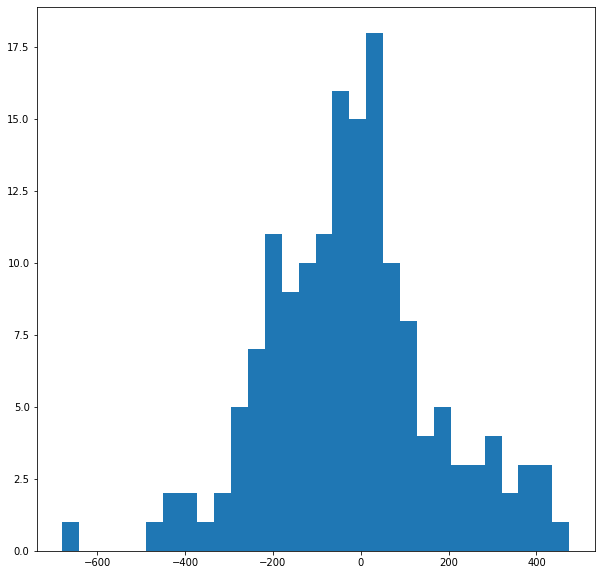

In [89]:
residuals = y_test - predictions_2
plt.figure(figsize = (10, 10))
plt.hist(residuals, bins = 30);

Остатки до сих пор смещены влево, модель завышает значения, но стоит отметить, что смещение уменьшилось по сравнению с первой моделью

### Разброс остатков

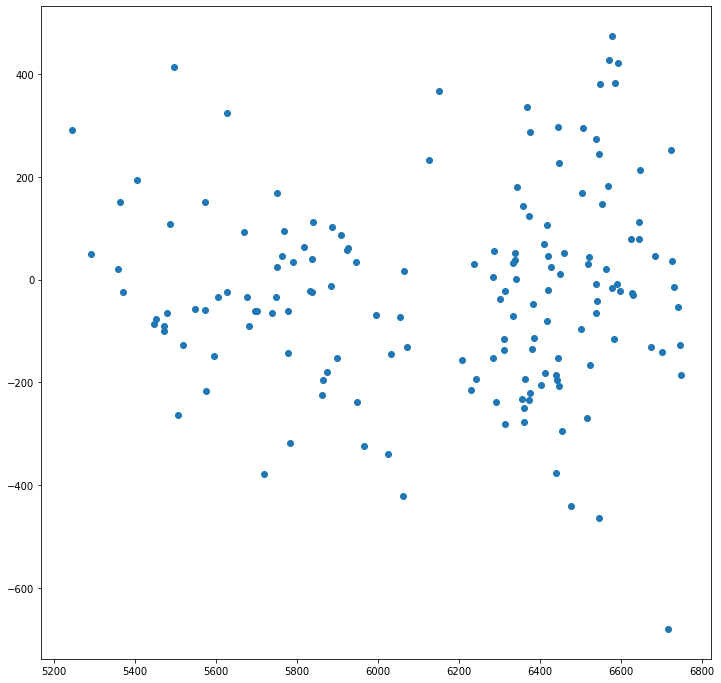

In [90]:
plt.figure(figsize = (12,12))
plt.scatter(x = predictions_2, y = residuals);

Разброс сильно уменьшился, стабильность модели увеличилась

Метрика R2 увеличилась на 3 процента по сравнению с метрикой R2 первой модели. Остатки до сих пор смещены влево, это говорит о том, что наша модель завышает значения. Разброс остатков уменьшился, стабильность модели увеличилась.

### Обучение третьей модели

### Добавление имени папы

In [91]:
ferma_main = ferma_main.merge(ferma_dad)

In [92]:
ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_кат,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,меньше 0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,меньше 0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,меньше 0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,меньше 0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,меньше 0.92,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,больше 0.92,237.16,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,меньше 0.92,166.41,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.92,207.36,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,меньше 0.92,190.44,Барин


### Разбиение на выборки

In [93]:
X = ferma_main[['эке_в_квадрате', 'возраст', 'порода_папы_быка', 'тип_пастбища', 'спо_кат', 'сырой_протеин', 'порода', 'имя_папы']]
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

### Кодирование категориальных признаков

In [94]:
lst = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода', 'спо_кат', 'имя_папы']
encoder = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe = encoder.fit_transform(X_train[lst])
X_test_ohe = encoder.transform(X_test[lst])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

### Масштабирование количественных признаков

In [95]:
lst = ['эке_в_квадрате', 'сырой_протеин']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[lst])
X_test_scaled = scaler.transform(X_test[lst])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=lst)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=lst)

### Обучение модели линейной регрессии

In [96]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [97]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions_3 = model_lr.predict(X_test)

### Оценка качества модели с помощью метрики R2

In [98]:
r2 = r2_score(y_test, predictions_3)
r2

0.8230304121339486

Метрика R2 стала равна 82%, она увеличилась на 1% по сравнению с метрикой R2 второй модели.

### Анализ остатков

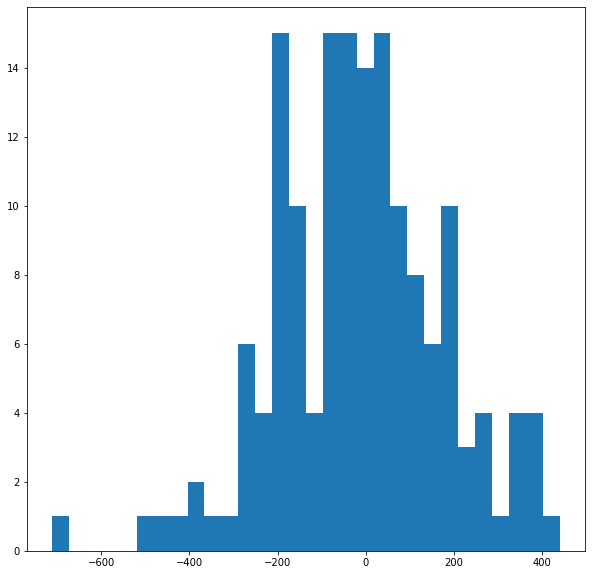

In [99]:
residuals = y_test - predictions_3
plt.figure(figsize = (10, 10))
plt.hist(residuals, bins = 30);

График похож на нормальное распределение, модель предсказывает нормально.

### Разброс остатков

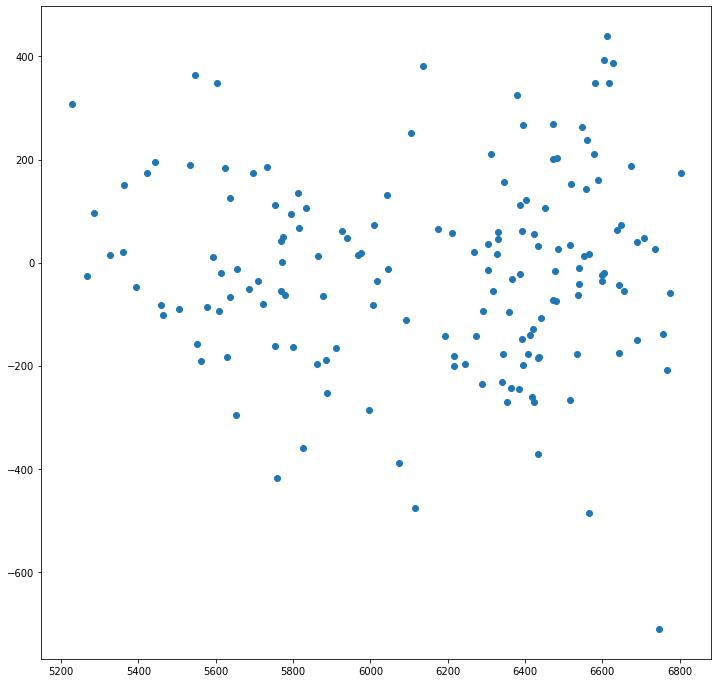

In [100]:
plt.figure(figsize = (12,12))
plt.scatter(x = predictions_3, y = residuals);

Разброс сильнее уменьшился, стабильность сильно увеличилась по сравнению с первой моделей.

R2 равен 82%, остатки никуда не смещены, модель предсказывает нормально, разброса практически не наблюдается.

Каждая следующая модель была лучше предыдущей, R2 у последней равна 82%, остатки не смещены.

### Оценка качества по метрикам MSE, MAE, RMSE

In [101]:
mse1 = mean_squared_error(y_test, predictions_1)
mae1 = mean_absolute_error(y_test, predictions_1)
rmse1 = mean_squared_error(y_test, predictions_1, squared = False)
print('', mse1,'\n', mae1,'\n', rmse1)

 43034.37768972468 
 161.55794121530894 
 207.44728894281718


In [102]:
mse2 = mean_squared_error(y_test, predictions_2)
mae2 = mean_absolute_error(y_test, predictions_2)
rmse2 = mean_squared_error(y_test, predictions_2, squared = False)
print('', mse2,'\n', mae2,'\n', rmse2)

 37322.62590871796 
 148.23083086947688 
 193.19064653527602


In [103]:
mse3 = mean_squared_error(y_test, predictions_3)
mae3 = mean_absolute_error(y_test, predictions_3)
rmse3 = mean_squared_error(y_test, predictions_3, squared = False)
print('', mse3,'\n', mae3,'\n', rmse3)

 36024.80787181598 
 146.65924087916707 
 189.80202283383593


Третья модель самая лучшая, судя по всем метрикам.

### Доверительный интервал

In [104]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6091.585264194662, 6221.354507805678)


/tmp/ipykernel_317/2049512329.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))


### Прогноз удоя коров

#### Добавление недостающих признаков в cow_buy

In [105]:
cow_buy['спо'] = ferma_main['спо'].mean() * 1.05
cow_buy['эке'] = ferma_main['эке'].mean() * 1.05
cow_buy['сырой_протеин'] = ferma_main['сырой_протеин'].mean() * 1.05

#### Устранение нелинейности признаков СПО и ЭКЕ

In [106]:
cow_buy['спо'] = cow_buy['спо'].apply(lambda x: 'меньше 0.92' if x < 0.92 else 'больше 0.92')
cow_buy['эке_в_квадрате'] = cow_buy['эке'] ** 2

### Кодирование категориальных признаков

In [107]:
lst = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода', 'спо', 'имя_папы']

cow_buy_ohe = encoder.transform(cow_buy[lst])

encoder_col_names = encoder.get_feature_names()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns = encoder_col_names)

#### Масштабирование количественных признаков признаков

In [108]:
lst = ['эке_в_квадрате', 'сырой_протеин']

cow_buy_scaled = scaler.transform(cow_buy[lst])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=lst)

In [109]:
cow_buy_pred = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
cow_buy_pred

,x0_менее_2_лет,x1_Соверин,x2_равнинные,x2_холмистое,x3_РефлешнСоверинг,x4_меньше 0.92,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_в_квадрате,сырой_протеин
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.542248,0.517384
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.542248,0.517384
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.542248,0.517384
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.542248,0.517384
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.542248,0.517384
5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.542248,0.517384
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.542248,0.517384
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.542248,0.517384
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.542248,0.517384
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.542248,0.517384


In [110]:
cow_buy['удой'] = model_lr.predict(cow_buy_pred)
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,спо,эке,сырой_протеин,эке_в_квадрате,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6614.072463
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6371.113130
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6287.867397
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6592.237358
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6547.915397
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6422.131546
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6561.403260
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6401.947228
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6344.682154
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6612.421676


Удой спрогнозирован в диапазоне от 6287 до 6614.

## Обучение модели логистической регрессии

### Подготовка данных

In [111]:
ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_кат,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,меньше 0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,меньше 0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,меньше 0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,меньше 0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,меньше 0.92,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,больше 0.92,237.16,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,меньше 0.92,166.41,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.92,207.36,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,меньше 0.92,190.44,Барин


In [112]:
X = ferma_main[['эке_в_квадрате', 'возраст', 'порода_папы_быка', 'тип_пастбища', 'спо_кат', 'сырой_протеин', 'порода',\
               'белок,%', 'жирность,%', 'имя_папы']]
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].apply(lambda x: 0 if x == 'не вкусно' else 1)
y = ferma_main['вкус_молока']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [113]:
X

,эке_в_квадрате,возраст,порода_папы_быка,тип_пастбища,спо_кат,сырой_протеин,порода,"белок,%","жирность,%",имя_папы
0,201.64,более_2_лет,Айдиал,равнинное,меньше 0.92,1743,Вис Бик Айдиал,3.076,3.58,Буйный
1,163.84,менее_2_лет,Соверин,равнинные,меньше 0.92,2138,Вис Бик Айдиал,3.079,3.54,Соловчик
2,196.00,более_2_лет,Соверин,холмистое,меньше 0.92,1854,РефлешнСоверинг,3.074,3.59,Барин
3,153.76,более_2_лет,Айдиал,холмистое,меньше 0.92,2012,РефлешнСоверинг,3.075,3.40,Буйный
4,163.84,менее_2_лет,Соверин,равнинные,меньше 0.92,1675,Вис Бик Айдиал,3.073,3.73,Барин
...,...,...,...,...,...,...,...,...,...,...
623,237.16,более_2_лет,Айдиал,равнинное,больше 0.92,1964,РефлешнСоверинг,3.075,3.74,Буйный
624,166.41,менее_2_лет,Соверин,равнинное,меньше 0.92,1700,РефлешнСоверинг,3.073,3.64,Барин
625,207.36,более_2_лет,Соверин,холмистое,меньше 0.92,1837,РефлешнСоверинг,3.075,3.64,Барин
626,190.44,более_2_лет,Соверин,равнинное,меньше 0.92,1994,РефлешнСоверинг,3.077,3.64,Барин


#### Кодирование категориальных признаков

In [114]:
lst = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода', 'спо_кат', 'имя_папы']
encoder = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe = encoder.fit_transform(X_train[lst])
X_test_ohe = encoder.transform(X_test[lst])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

#### Масштабирование количественных признаков

In [115]:
lst = ['эке_в_квадрате', 'сырой_протеин', 'белок,%', 'жирность,%']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[lst])
X_test_scaled = scaler.transform(X_test[lst])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=lst)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=lst)

#### Обучение модели логистической регрессии

In [116]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

#### Оценка качества модели с помощью метрик accuracy, recall, precision

In [117]:
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print(accuracy)
print(recall)
print(precision)

0.6114649681528662
0.8522727272727273
0.6097560975609756


Метрика accuracy = 62 %, recall = 85 %, precision = 61 %

Text(0.5, 123.0, 'Predicted')

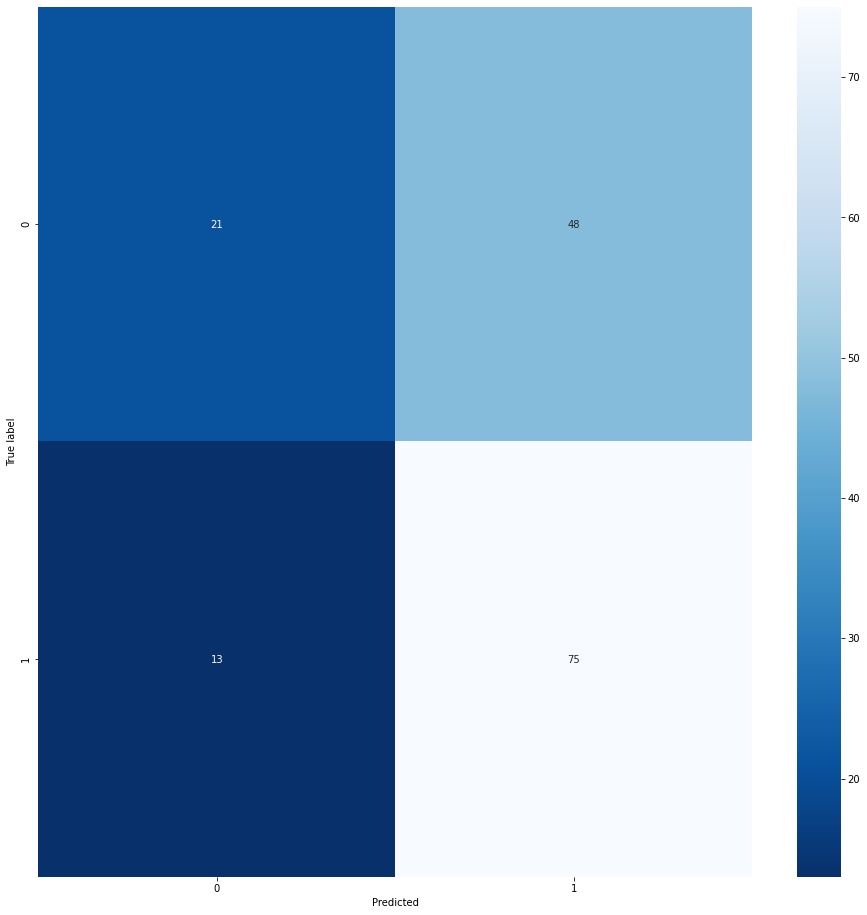

In [118]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize = (16,16))
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Модель верно предсказала 76 вкусного молока


Верно предсказала 23 невкусного молока


Определила 12 вкусного молока как невкусное


Определила 46 невкусного молока как вкусное.


Так как для фермера самое важное - это вкусное молоко, нам нужно минизировать ошибку первого рода, т.е. определение невкусного молока, как вкусное. Фермеру совсем не хочется иметь невкусное молоко. 

### Анализ модели

### Изменение порога принадлежности к классам

In [119]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head()

,y_valid,y_proba
85,1,0.862551
66,1,0.841852
51,1,0.841134
110,1,0.840560
8,1,0.815887


In [120]:
thresholds = [round(i,2) for i in np.linspace(0.5, 1,num = 6,endpoint=False)]
print(thresholds)

[0.5, 0.58, 0.67, 0.75, 0.83, 0.92]


In [121]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('ypred'+str(i))
    data['ypred'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,ypred0.5,ypred0.58,ypred0.67,ypred0.75,ypred0.83,ypred0.92
0,1,0.669080,1,1,0,0,0,0
1,1,0.679706,1,1,1,0,0,0
2,1,0.655367,1,1,0,0,0,0
3,0,0.440837,0,0,0,0,0,0
4,1,0.796321,1,1,1,1,0,0


In [122]:
for i in thresholds:
    print(f'ypred{i} Precision = ', precision_score(data['y_valid'], data[f'ypred{i}']))

ypred0.5 Precision =  0.6097560975609756
ypred0.58 Precision =  0.6990291262135923
ypred0.67 Precision =  0.7857142857142857
ypred0.75 Precision =  0.88
ypred0.83 Precision =  1.0
ypred0.92 Precision =  0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
thresholds = [round(i,2) for i in np.linspace(0.7, 0.9,num = 10,endpoint=False)]
print(thresholds)

[0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88]


In [124]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('ypred'+str(i))
    data['ypred'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,ypred0.7,ypred0.72,ypred0.74,ypred0.76,ypred0.78,ypred0.8,ypred0.82,ypred0.84,ypred0.86,ypred0.88
0,1,0.669080,0,0,0,0,0,0,0,0,0,0
1,1,0.679706,0,0,0,0,0,0,0,0,0,0
2,1,0.655367,0,0,0,0,0,0,0,0,0,0
3,0,0.440837,0,0,0,0,0,0,0,0,0,0
4,1,0.796321,1,1,1,1,1,0,0,0,0,0


In [125]:
for i in thresholds:
    print(f'ypred{i} Precision = ', precision_score(data['y_valid'], data[f'ypred{i}']))

ypred0.7 Precision =  0.8
ypred0.72 Precision =  0.8205128205128205
ypred0.74 Precision =  0.8666666666666667
ypred0.76 Precision =  0.8695652173913043
ypred0.78 Precision =  0.8235294117647058
ypred0.8 Precision =  0.8888888888888888
ypred0.82 Precision =  1.0
ypred0.84 Precision =  1.0
ypred0.86 Precision =  1.0
ypred0.88 Precision =  0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


При значении порога в 0.82 precision равняется единице, при таком значении порога ошибка первого рода минимизируется.

In [126]:
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.82).astype(int) 
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('Accuracy', round(accuracy, 3))
print('Precision', round(precision, 3))
print('Recall', round(recall, 3))

Accuracy 0.465
Precision 1.0
Recall 0.045


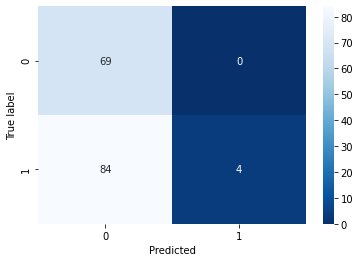

In [127]:
cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Мы минимизировали значение ошибку первого рода при значении порога в 0.82

### Обучение модели на данных cow_buy

#### Кодирование категориальных признаков

In [128]:
cat_columns = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода', 'спо', 'имя_папы']

cow_buy_ohe = encoder.transform(cow_buy[cat_columns])

encoder_col_names = encoder.get_feature_names()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)


#### Масштабирование количественных признаков

In [129]:
num_columns = ['эке_в_квадрате', 'сырой_протеин', 'белок,%', 'жирность,%']
cow_buy_scaled = scaler.transform(cow_buy[num_columns])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_columns)

In [130]:
cow_buy_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

In [131]:
taste_pred = (clf.predict_proba(cow_buy_new)[:, 1] >= 0.82).astype(int)
taste_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
# код ревьюера
cow_buy_new.head(1)

,x0_менее_2_лет,x1_Соверин,x2_равнинные,x2_холмистое,x3_РефлешнСоверинг,x4_меньше 0.92,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_в_квадрате,сырой_протеин,"белок,%","жирность,%"
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.542248,0.517384,0.094429,-0.158918


In [133]:
cow_buy['вкус'] = taste_pred

In [134]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,спо,эке,сырой_протеин,эке_в_квадрате,удой,вкус
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6614.072463,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6371.113130,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6287.867397,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6592.237358,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6547.915397,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6422.131546,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6561.403260,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6401.947228,0
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6344.682154,0
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6612.421676,0


Наша модель выявила ни одной коровы со вкусным молоком.

## Итоговые выводы

<b>Датафрейм с прогнозом вкуса и удоя коров, которых рассматривает фермер для покупки:</b>

In [135]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,спо,эке,сырой_протеин,эке_в_квадрате,удой,вкус
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6614.072463,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6371.113130,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6287.867397,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6592.237358,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6547.915397,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6422.131546,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6561.403260,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6401.947228,0
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6344.682154,0
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,больше 0.92,15.276162,2019.947532,233.361138,6612.421676,0


<b>Коровы, у которых вкусное молоко, и удой выше 6000 кг в год:<b>

In [136]:
cow_buy[(cow_buy['удой'] >= 6000) & (cow_buy['вкус'] == 1)]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,спо,эке,сырой_протеин,эке_в_квадрате,удой,вкус


Наша модель не выявила ни одной коровы с удоем больше 6000 кг в год и вкусным молоком.

### Результаты работы моделей

<b>Ни у одной коровы модель спрогнозировала удой выше 6000 кг в год и вкусное молоко.</b>

<b>Вторая модель не спрогнозировала ни у одной коровы вкусное молоко.</b>

<b>Фермеру лучше не покупать ни одной коровы, т.к ни одной из них нет вкусного молока.</b>

### Вывод о моделях

<b>Для улучшения качества регрессионой модели мы использовали следующее:
    
    Преобразовали СПО в категориальный бинарный признак, чтобы избавиться от нелинейной зависимости.
    Преобразовали ЭКЕ, возведя этот признак в квадрат, чтобы избавиться от нелинейной зависимости.
    Добавили дополнительный признак "имя_папы".
</b>

<b>Для дальнейшего улучшения работы можно добавить какой-нибудь дополнительный признак.

<b>Можно сказать, что метрика accuracy важны во всех моделях классификации. Метрики же precision и recall зависят от поставленных задач.</b>